# Rotten Tomatoes movie review - Weekly Project

The Rotten Tomatoes movie review dataset is a corpus of movie reviews used for sentiment analysis

This competition presents a chance to benchmark your sentiment-analysis ideas on the Rotten Tomatoes dataset. You are asked to label phrases on a scale of five values: 
- negative
- somewhat negative
- neutral
- somewhat positive
- positive. 

Obstacles like sentence negation, sarcasm, terseness, language ambiguity, and many others make this task very challenging.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
from nltk.stem import PorterStemmer
import nltk
# nltk.download('stopwords')
# nltk.download()

from collections import Counter

In [9]:
import pickle
import os
import re 

In [10]:
df_train = pd.read_csv('train.csv')

In [11]:
df_train.drop(columns='Unnamed: 0').head()

,PhraseId,SentenceId,Phrase,Sentiment
0,122,4,positively,3
1,19366,851,disguise the slack complacency of -LRB- Godard...,1
2,54763,2726,realizes a fullness that does not negate the s...,3
3,89708,4667,sealed,2
4,33494,1571,Go Where We Went 8 Movies Ago,3


<AxesSubplot:xlabel='Sentiment', ylabel='SentenceId'>

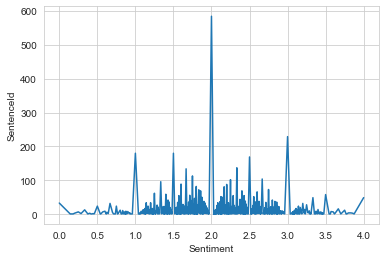

In [12]:
data = df_train.groupby('SentenceId').mean()['Sentiment'].to_frame().reset_index(level=0)
data1 = data.groupby('Sentiment').count()['SentenceId'].to_frame().reset_index(level=0)
sns.lineplot(x='Sentiment', y='SentenceId', data=data1)

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

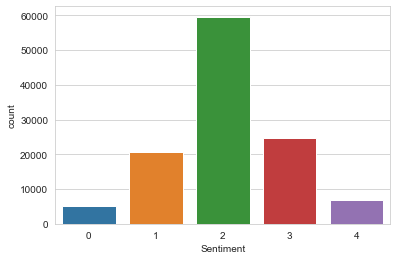

In [13]:
sns.countplot(x='Sentiment', data=df_train)

## **Preprocessing functions**

#### Stopwords:
Downloading list of stopwords

In [71]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#### Special characters:

In [72]:
def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # Also Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

In [66]:
# count = CountVectorizer()
# bag = count.fit(df_train['Phrase'])

In [75]:
# vocab = bag.get_feature_names()
# print(vocab)

['000', '10', '100', '101', '102', '103', '104', '105', '10th', '11', '110', '112', '12', '120', '127', '129', '12th', '13', '13th', '14', '140', '146', '15', '15th', '16', '163', '168', '170', '1790', '18', '1899', '19', '1915', '1920', '1930s', '1933', '1937', '1938', '1940s', '1950', '1950s', '1952', '1953', '1957', '1958', '1959', '1960', '1960s', '1962', '1970', '1970s', '1971', '1972', '1973', '1975', '1979', '1980', '1980s', '1984', '1986', '1987', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1997', '1998', '1999', '19th', '20', '2000', '2001', '2002', '20th', '21', '21st', '22', '24', '2455', '25', '26', '270', '295', '30', '300', '3000', '30s', '37', '3d', '40', '40s', '42', '451', '48', '4ever', '4th', '4w', '50', '500', '50s', '51', '51st', '52', '53', '5ths', '60', '60s', '65', '65th', '66', '70', '70s', '71', '72', '75', '77', '78', '7th', '80', '800', '80s', '83', '84', '85', '86', '87', '88', '89', '8th', '90', '90s', '91', '93', '94', '95', '96', '98', '99',

In [89]:
# df1 = df_train['Phrase'].to_list()
# df2 = []
# for sentence in df1:
#     a = sentence.split(' ')
#     for word in a:
#         if word not in df2:
#             df2.append(word)

AttributeError: 'list' object has no attribute 'len'

In [94]:
# from collections import Counter

# vocab1 = Counter()
# for each in df_train['Phrase']: # Return sentence
#     for word in each.split(' '): # Loop for each word in the sentence and check frequency
#         vocab1[word] += 1

# print(vocab1)

Counter({'the': 34583, ',': 31356, 'a': 25066, 'of': 24153, 'and': 23762, 'to': 16686, '.': 13131, "'s": 12630, 'in': 10128, 'is': 9934, 'that': 9071, 'it': 7719, 'as': 6340, 'with': 5711, 'for': 5445, 'its': 5243, 'film': 4953, 'an': 4457, 'movie': 4353, 'this': 3805, 'be': 3803, 'but': 3724, 'on': 3517, 'The': 3481, 'you': 3440, "n't": 2935, 'by': 2874, 'more': 2865, 'his': 2783, 'about': 2692, 'from': 2576, 'than': 2568, 'at': 2566, '--': 2550, 'or': 2547, 'not': 2533, 'one': 2526, 'all': 2263, 'have': 2260, 'are': 2231, 'like': 2137, "'": 2124, 'has': 2061, 'A': 2024, 'so': 1898, 'story': 1824, '-RRB-': 1820, 'out': 1758, 'who': 1717, 'most': 1638, 'into': 1614, 'too': 1575, '-LRB-': 1556, 'up': 1539, 'good': 1488, 'their': 1438, 'characters': 1411, '...': 1379, '`': 1370, "''": 1360, '``': 1357, 'can': 1347, 'much': 1340, 'I': 1314, 'comedy': 1292, 'no': 1266, 'your': 1263, 'if': 1228, 'some': 1209, 'time': 1199, 'just': 1189, 'what': 1180, 'does': 1179, 'will': 1160, 'way': 1146,

In [99]:
# df3 = " ".join(df2)

#### Stemming

In [73]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()


In [74]:
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [75]:
def tokenizer_lemma(text):
    return [wnl.lemmatize(word, pos='a') for word in text.split()]

In [76]:
tokenizer_lemma('rocks')

['rocks']

## **TRAINING TFIDF**

In [109]:
# Splitting data
X = df_train['Phrase']
y = df_train['Sentiment']
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X, y, test_size=0.2, random_state=693)

In [110]:
X_train_tf.shape

(93636,)

In [111]:
# Set up function

tfidf = TfidfVectorizer(stop_words=stop_words,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)

In [112]:
# Set up pipeline and train

clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(random_state=0))])

clf.fit(X_train_tf, y_train_tf)

Pipeline(steps=[('vect',
                 TfidfVectorizer(preprocessor=<function preprocessor at 0x143b4f4d0>,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function tokenizer_porter at 0x143b4fd40>)),
                ('clf', LogisticRegression(random_state=0))])

In [113]:
# Result for prediction

predictions_tf = clf.predict(X_test_tf)
print('accuracy:',accuracy_score(y_test_tf,predictions_tf))
print('confusion matrix:\n',confusion_matrix(y_test_tf,predictions_tf))
print('classification report:\n',classification_report(y_test_tf,predictions_tf))

accuracy: 0.6280917595796488
confusion matrix:
 [[  182   524   307    41     0]
 [  100  1489  2240   209     6]
 [   27   680 10436   886    21]
 [    5   142  2282  2276   180]
 [    1    13   238   804   320]]
classification report:
               precision    recall  f1-score   support

           0       0.58      0.17      0.27      1054
           1       0.52      0.37      0.43      4044
           2       0.67      0.87      0.76     12050
           3       0.54      0.47      0.50      4885
           4       0.61      0.23      0.34      1376

    accuracy                           0.63     23409
   macro avg       0.58      0.42      0.46     23409
weighted avg       0.61      0.63      0.60     23409



In [132]:
df_train[df_train['SentenceId'] == 2]

,Unnamed: 0,PhraseId,SentenceId,Phrase,Sentiment
7497,7497,69,2,quiet,2
15179,15179,67,2,"quiet , introspective and entertaining indepen...",4
18025,18025,79,2,is worth,2
22965,22965,75,2,entertaining,4
27834,27834,65,2,"This quiet , introspective and entertaining in...",3
30815,30815,76,2,independent,2
39057,39057,77,2,is worth seeking .,3
42763,42763,72,2,introspective and,3
48903,48903,80,2,worth,2
57595,57595,66,2,This,2


In [129]:
a = df_train.groupby('SentenceId').count()['Sentiment'].to_dict()

In [130]:
a

{1: 47,
 2: 15,
 3: 29,
 4: 32,
 5: 8,
 6: 22,
 7: 10,
 8: 25,
 9: 9,
 10: 10,
 11: 23,
 12: 34,
 13: 9,
 14: 32,
 15: 14,
 16: 27,
 17: 13,
 18: 30,
 19: 15,
 20: 13,
 21: 7,
 22: 37,
 23: 18,
 24: 26,
 25: 13,
 26: 20,
 27: 14,
 28: 33,
 29: 17,
 30: 18,
 31: 5,
 32: 24,
 33: 26,
 34: 18,
 35: 23,
 36: 22,
 37: 15,
 38: 22,
 39: 23,
 40: 9,
 41: 26,
 42: 23,
 43: 25,
 44: 15,
 45: 8,
 46: 31,
 47: 16,
 48: 19,
 49: 19,
 50: 29,
 51: 21,
 52: 32,
 53: 22,
 54: 23,
 55: 10,
 56: 6,
 57: 8,
 58: 25,
 59: 29,
 60: 16,
 61: 27,
 62: 25,
 63: 23,
 64: 13,
 65: 15,
 66: 30,
 67: 34,
 68: 5,
 69: 28,
 70: 29,
 71: 16,
 72: 21,
 73: 4,
 74: 7,
 75: 18,
 76: 2,
 77: 13,
 78: 26,
 79: 13,
 80: 10,
 81: 28,
 82: 44,
 83: 19,
 84: 8,
 85: 9,
 86: 20,
 87: 18,
 88: 15,
 89: 18,
 90: 22,
 91: 21,
 92: 13,
 93: 28,
 94: 11,
 95: 24,
 96: 11,
 97: 28,
 98: 17,
 99: 16,
 100: 11,
 101: 31,
 102: 19,
 103: 33,
 104: 4,
 105: 9,
 106: 29,
 107: 23,
 108: 31,
 109: 21,
 110: 26,
 111: 30,
 112: 33,
 113:

In [195]:
# res = []
# for i in range(700):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
#     tfidf = TfidfVectorizer(stop_words=stop_words,
#                         tokenizer=tokenizer_lemma,
#                         preprocessor=preprocessor)
#     clf = Pipeline([('vect', tfidf),
#                 ('clf', LogisticRegression(random_state=0))])

#     clf.fit(X_train, y_train)
#     d = {'seed':'', 'accuracy':''}
#     predictions = clf.predict(X_test)
#     d['accuracy'] = accuracy_score(y_test,predictions)
#     d['seed'] = i
#     res.append(d)
#     print(len(res))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [196]:
# res

[{'seed': 0, 'accuracy': 0.6279636037421504},
 {'seed': 1, 'accuracy': 0.6268956384296638},
 {'seed': 2, 'accuracy': 0.6213422188047332},
 {'seed': 3, 'accuracy': 0.6172839506172839},
 {'seed': 4, 'accuracy': 0.6195053184672562},
 {'seed': 5, 'accuracy': 0.6235635866547055},
 {'seed': 6, 'accuracy': 0.6195907556922551},
 {'seed': 7, 'accuracy': 0.6286898201546414},
 {'seed': 8, 'accuracy': 0.6251868939296852},
 {'seed': 9, 'accuracy': 0.6185227903797684},
 {'seed': 10, 'accuracy': 0.622324746892221},
 {'seed': 11, 'accuracy': 0.6202315348797471},
 {'seed': 12, 'accuracy': 0.6202315348797471},
 {'seed': 13, 'accuracy': 0.6218975607672262},
 {'seed': 14, 'accuracy': 0.6223674655047204},
 {'seed': 15, 'accuracy': 0.6196761929172541},
 {'seed': 16, 'accuracy': 0.6213849374172327},
 {'seed': 17, 'accuracy': 0.6233499935922081},
 {'seed': 18, 'accuracy': 0.6233499935922081},
 {'seed': 19, 'accuracy': 0.6177538553547781},
 {'seed': 20, 'accuracy': 0.6186082276047674},
 {'seed': 21, 'accuracy'